<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt


Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [3]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [5]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [6]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


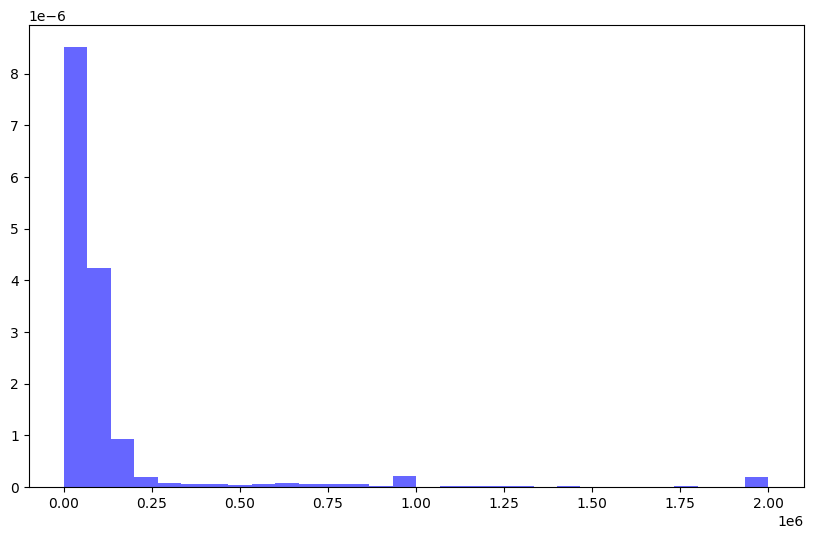

<class 'ModuleNotFoundError'>: No module named 'scipy'

In [12]:
# Drop any missing values in the ConvertedComp column
df = df.dropna(subset=['ConvertedComp'])

# Plot the distribution curve
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'], bins=30, density=True, alpha=0.6, color='b')
df['ConvertedComp'].plot(kind='kde', color='red')  # KDE overlay
plt.title("Distribution of Annual USD Salaries (ConvertedComp)")
plt.xlabel("Annual Salary in USD")
plt.ylabel("Density")
plt.show()


Plot the histogram for the column `ConvertedComp`.


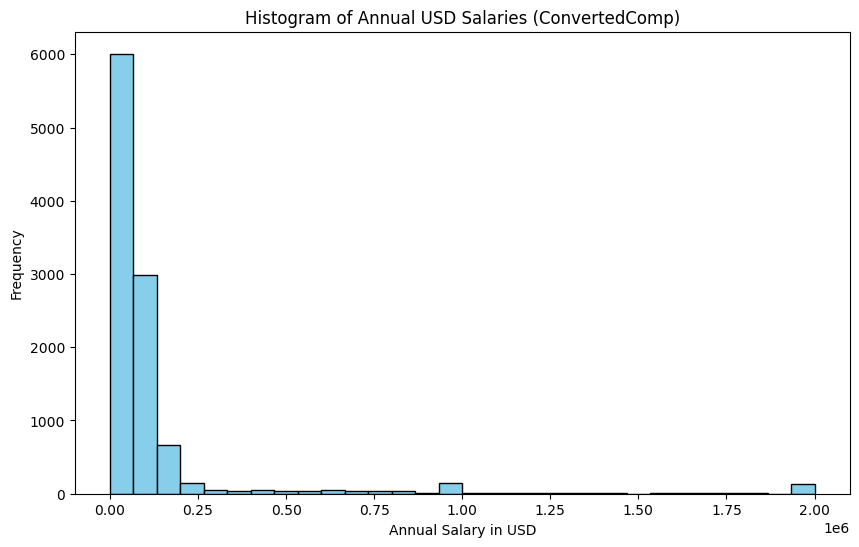

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'], bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram of Annual USD Salaries (ConvertedComp)")
plt.xlabel("Annual Salary in USD")
plt.ylabel("Frequency")
plt.show()


What is the median of the column `ConvertedComp`?


In [15]:
median_CC = df['ConvertedComp'].median()
print(median_CC)


57745.0


How many responders identified themselves only as a **Man**?


In [17]:
male_count = df['Gender'].value_counts()['Man']  # or 'M' depending on your encoding
print(f"Number of male respondents: {male_count}")

gender_distribution = df['Gender'].value_counts()
print("\nOverall gender distribution:")
print(gender_distribution)


Number of male respondents: 9725

Overall gender distribution:
Gender
Man                                                            9725
Woman                                                           679
Non-binary, genderqueer, or gender non-conforming                59
Man;Non-binary, genderqueer, or gender non-conforming            26
Woman;Non-binary, genderqueer, or gender non-conforming          14
Woman;Man                                                         7
Woman;Man;Non-binary, genderqueer, or gender non-conforming       2
Name: count, dtype: int64


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [27]:
female_count = df['Gender'].value_counts()['Woman']  # or 'M' depending on your encoding
print(f"Number of female respondents: {female_count}")

gender_distribution = df['Gender'].value_counts()
print("\nOverall gender distribution:")
print(gender_distribution)


Number of female respondents: 679

Overall gender distribution:
Gender
Man                                                            9725
Woman                                                           679
Non-binary, genderqueer, or gender non-conforming                59
Man;Non-binary, genderqueer, or gender non-conforming            26
Woman;Non-binary, genderqueer, or gender non-conforming          14
Woman;Man                                                         7
Woman;Man;Non-binary, genderqueer, or gender non-conforming       2
Name: count, dtype: int64


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [19]:
# Five number summary for Age column
age_summary = df['Age'].describe()
five_num_summary = {
    'Minimum': age_summary['min'],
    'Q1': age_summary['25%'],
    'Median': age_summary['50%'],
    'Q3': age_summary['75%'],
    'Maximum': age_summary['max']
}

print("Five Number Summary for Age:")
for stat, value in five_num_summary.items():
    print(f"{stat}: {value}")


Five Number Summary for Age:
Minimum: 16.0
Q1: 25.0
Median: 29.0
Q3: 35.0
Maximum: 99.0


Plot a histogram of the column `Age`.


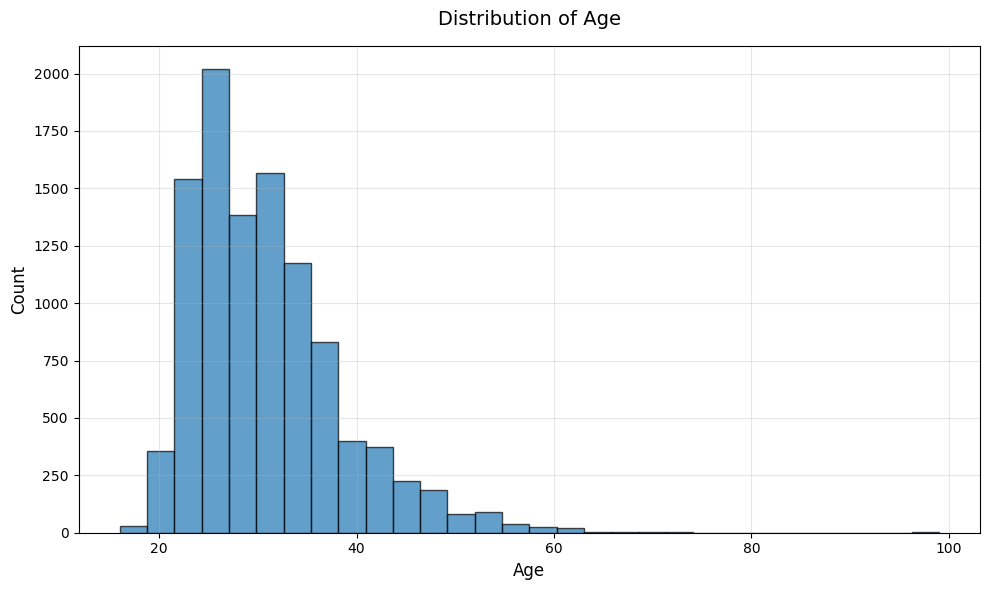

In [21]:
import matplotlib.pyplot as plt

# Create figure and axis with larger size
plt.figure(figsize=(10, 6))

# Create histogram
plt.hist(df['Age'], bins=30, edgecolor='black', alpha=0.7)

# Customize the plot
plt.title('Distribution of Age', fontsize=14, pad=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


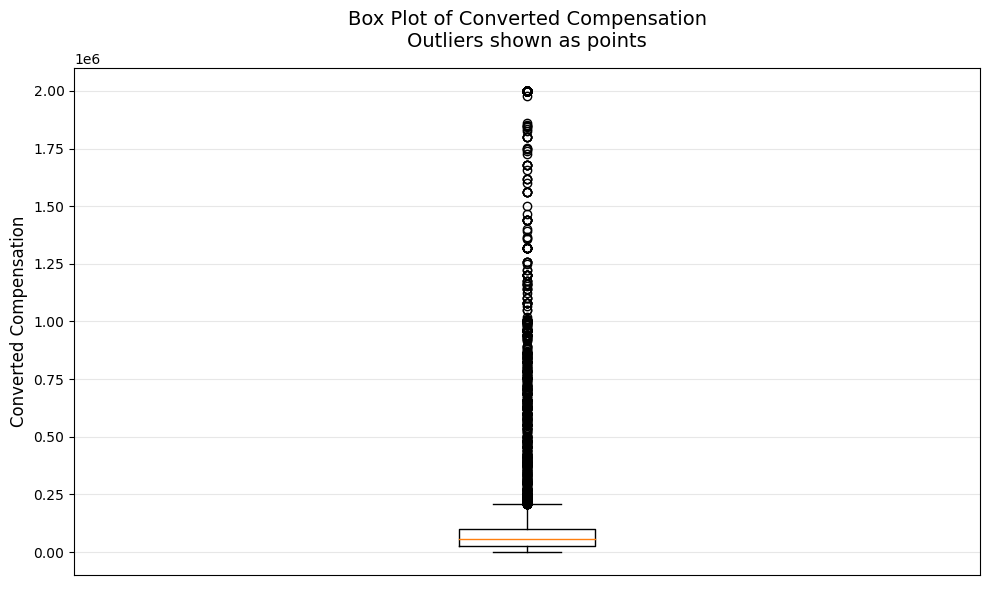


Summary Statistics:
Q1 (25th percentile): 26,868.00
Q3 (75th percentile): 100,000.00
IQR: 73,132.00
Lower bound: -82,830.00
Upper bound: 209,698.00

Number of outliers: 879
Percentage of outliers: 8.31%


In [22]:
import matplotlib.pyplot as plt

# Create figure with larger size
plt.figure(figsize=(10, 6))

# Create box plot
plt.boxplot(df['ConvertedComp'], vert=True, whis=1.5)

# Customize the plot
plt.title('Box Plot of Converted Compensation\nOutliers shown as points', fontsize=14, pad=15)
plt.ylabel('Converted Compensation', fontsize=12)

# Remove x-axis label since we only have one variable
plt.xticks([])

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Calculate statistical measures to quantify outliers
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]['ConvertedComp']
print(f"\nSummary Statistics:")
print(f"Q1 (25th percentile): {Q1:,.2f}")
print(f"Q3 (75th percentile): {Q3:,.2f}")
print(f"IQR: {IQR:,.2f}")
print(f"Lower bound: {lower_bound:,.2f}")
print(f"Upper bound: {upper_bound:,.2f}")
print(f"\nNumber of outliers: {len(outliers)}")
print(f"Percentage of outliers: {(len(outliers) / len(df) * 100):.2f}%")


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [23]:
# Calculate Q1, Q3 and IQR
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

print(f"First Quartile (Q1): {Q1:,.2f}")
print(f"Third Quartile (Q3): {Q3:,.2f}")
print(f"Inter Quartile Range (IQR): {IQR:,.2f}")


First Quartile (Q1): 26,868.00
Third Quartile (Q3): 100,000.00
Inter Quartile Range (IQR): 73,132.00


Find out the upper and lower bounds.


In [24]:
# Calculate Q1, Q3 and IQR
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

# Calculate bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"First Quartile (Q1): {Q1:,.2f}")
print(f"Third Quartile (Q3): {Q3:,.2f}")
print(f"Inter Quartile Range (IQR): {IQR:,.2f}")
print("\nBounds:")
print(f"Lower bound (Q1 - 1.5*IQR): {lower_bound:,.2f}")
print(f"Upper bound (Q3 + 1.5*IQR): {upper_bound:,.2f}")

# Values beyond these bounds are considered outliers


First Quartile (Q1): 26,868.00
Third Quartile (Q3): 100,000.00
Inter Quartile Range (IQR): 73,132.00

Bounds:
Lower bound (Q1 - 1.5*IQR): -82,830.00
Upper bound (Q3 + 1.5*IQR): 209,698.00


Identify how many outliers are there in the `ConvertedComp` column.


In [25]:
# Calculate Q1, Q3 and IQR
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

# Calculate bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]['ConvertedComp']

print(f"Summary Statistics:")
print(f"Q1 (25th percentile): {Q1:,.2f}")
print(f"Q3 (75th percentile): {Q3:,.2f}")
print(f"IQR: {IQR:,.2f}")
print(f"\nBounds:")
print(f"Lower bound: {lower_bound:,.2f}")
print(f"Upper bound: {upper_bound:,.2f}")
print(f"\nOutlier Analysis:")
print(f"Number of outliers: {len(outliers)}")
print(f"Percentage of outliers: {(len(outliers) / len(df) * 100):.2f}%")

# Separate upper and lower outliers
lower_outliers = df[df['ConvertedComp'] < lower_bound]['ConvertedComp']
upper_outliers = df[df['ConvertedComp'] > upper_bound]['ConvertedComp']

print(f"\nBreakdown:")
print(f"Number of lower outliers: {len(lower_outliers)}")
print(f"Number of upper outliers: {len(upper_outliers)}")

Summary Statistics:
Q1 (25th percentile): 26,868.00
Q3 (75th percentile): 100,000.00
IQR: 73,132.00

Bounds:
Lower bound: -82,830.00
Upper bound: 209,698.00

Outlier Analysis:
Number of outliers: 879
Percentage of outliers: 8.31%

Breakdown:
Number of lower outliers: 0
Number of upper outliers: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [26]:
# Calculate Q1, Q3 and IQR
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

# Calculate bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create new dataframe without outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Print info about the original and new dataframe
print("Original dataframe shape:", df.shape)
print("New dataframe shape:", df_no_outliers.shape)
print(f"Number of rows removed: {df.shape[0] - df_no_outliers.shape[0]}")

# Basic statistics of ConvertedComp before and after removing outliers
print("\nConvertedComp Statistics:")
print("\nBefore removing outliers:")
print(df['ConvertedComp'].describe())
print("\nAfter removing outliers:")
print(df_no_outliers['ConvertedComp'].describe())


Original dataframe shape: (10582, 85)
New dataframe shape: (9703, 85)
Number of rows removed: 879

ConvertedComp Statistics:

Before removing outliers:
count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

After removing outliers:
count      9703.000000
mean      59883.208389
std       43394.336755
min           0.000000
25%       24060.000000
50%       52704.000000
75%       85574.500000
max      209356.000000
Name: ConvertedComp, dtype: float64


In [31]:
median_age = df_no_outliers['ConvertedComp'].median()
print(median_age)

52704.0


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [32]:
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
numerical_cols.remove('Age')

# Calculate the correlation between 'Age' and each numerical column
correlation_df = df[['Age']].corrwith(df[numerical_cols])

print(correlation_df)


Age             NaN
CodeRevHrs      NaN
CompTotal       NaN
ConvertedComp   NaN
Respondent      NaN
WorkWeekHrs     NaN
dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
